In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-3g'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='JW')
### HAMILTONIAN end

#####################################

QubitHamiltonian

(-0.32760818995565577+0j) [] +
(-0.04919764587885283+0j) [X0 X1 Y2 Y3] +
(0.04919764587885283+0j) [X0 Y1 Y2 X3] +
(0.04919764587885283+0j) [Y0 X1 X2 Y3] +
(-0.04919764587885283+0j) [Y0 Y1 X2 X3] +
(0.1371657293179602+0j) [Z0] +
(0.15660062486143395+0j) [Z0 Z1] +
(0.10622904488350779+0j) [Z0 Z2] +
(0.15542669076236065+0j) [Z0 Z3] +
(0.1371657293179602+0j) [Z1] +
(0.15542669076236065+0j) [Z1 Z2] +
(0.10622904488350779+0j) [Z1 Z3] +
(-0.13036292044009176+0j) [Z2] +
(0.1632676867167479+0j) [Z2 Z3] +
(-0.13036292044009176+0j) [Z3]

In [2]:
from quchem.Ansatz_Generator_Functions import *


ansatz_obj = Ansatz(Hamilt.molecule.n_electrons, Hamilt.molecule.n_qubits)



Sec_Quant_CC_ops_ia, Sec_Quant_CC_ops_ijab, theta_parameters_ia, theta_parameters_ijab=ansatz_obj.Get_ia_and_ijab_terms(single_cc_amplitudes=None, 
                                                                                                             double_cc_amplitudes=None, 
                                                                                                             singles_hamiltonian=None,
                                                                                                             doubles_hamiltonian=None, 
                                                                                                             tol_filter_small_terms = None)

Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(
                                        Sec_Quant_CC_ops_ia,
                                        Sec_Quant_CC_ops_ijab,
                                       transformation='JW')


In [3]:
input_state = ansatz_obj.Get_JW_HF_state_in_OCC_basis()
print(input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     Qubit_Op_list_Second_Quant_CC_Ops_ia, 
                                     Qubit_Op_list_Second_Quant_CC_Ops_ijab)

UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_parameters_ia, 
                                         Theta_param_list_ijab=theta_parameters_ijab,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

[1, 1, 0, 0]


0: ───X───Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────@───────────H──────────Rx(0.5π)───@──────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───H──────────@──────────────────────────────@──────────H───────────Rx(0.5π)───@───────────────────────────────────────@───────────Rx(-0.5π)───H──────────@───────────────────────────────────────@───────────H───────────H───@───────────────────────────────────────@──────────H───Rx(0.5π)───@──────────────────────────────────────@───Rx(-0.5π)───
                     │                       │                   │                      │                                                                                                                    │                               │                                 │                              │                                  │                              │                          │                              │                                 │                                       │                                  │                                       │                           │                                       │                         │                                      │
1: ───X──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───@───────────────────────@───Rx(-0.5π)───H───@──────────────────────@───────────H──────────H───X───@───────────────────────@───X───────────H──────────Rx(0.5π)───X───@──────────────────────@───X───────────Rx(-0.5π)───H──────────X───@──────────────────────@───X───H───────────Rx(0.5π)───X───@──────────────────────@───X──────────Rx(-0.5π)───H──────────X───@───────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@───────────────────────@───────────X───────────Rx(-0.5π)───H───X───@───────────────────────@───────────X──────────H───Rx(0.5π)───X───@──────────────────────@───────────X───Rx(-0.5π)───
                         │               │                           │              │                          │                       │                   │                      │                              │                       │                                         │                      │                                          │                      │                                  │                      │                                         │                       │                                                  │                       │                                           │                       │                                         │                      │
2: ───I───H──────────────X───Rz(-0.0π)───X───H───Rx(0.5π)────────────X───Rz(0.0π)───X───Rx(-0.5π)──────────────X───@───────────────@───X───────────────────X───@──────────────@───X───────────Rx(0.5π)───────────X───@───────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@──────────────@───X───Rx(-0.5π)───H──────────────────────────X───@──────────────@───X───H───H──────────────────────────X───@──────────────@───X───H──────────Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@───────────────@───X───────────Rx(-0.5π)───H───────────────────X───@───────────────@───X───────────H──────────H──────────────────X───@──────────────@───X───────────H───────────────
                                                                                                                   │               │                           │              │                                      │               │                                                 │              │                                                  │              │                                          │             

In [4]:
Qubit_Op_list_Second_Quant_CC_Ops_ijab

[0.125j [X0 X1 X2 Y3] +
 0.125j [X0 X1 Y2 X3] +
 -0.125j [X0 Y1 X2 X3] +
 0.125j [X0 Y1 Y2 Y3] +
 -0.125j [Y0 X1 X2 X3] +
 0.125j [Y0 X1 Y2 Y3] +
 -0.125j [Y0 Y1 X2 Y3] +
 -0.125j [Y0 Y1 Y2 X3]]

From Helgaker, T., P. Jorgensen,and J. Olsen (2014),Molecularelectronic-structure theory(John Wiley & Sons)
we known

$$H_{2}^{ground} = 0.9939| 1100\rangle - 0.1106| 0011\rangle$$


LOOK at:

PHYS. REV. X, **8**, 031022 (2018)

In [5]:
from quchem.LCU_method import *

In [6]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(QubitHamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 15/15 [00:00<00:00, 1015.82it/s]


{0: [(0.15542669076236065+0j) [Z1 Z2]],
 1: [(0.15542669076236065+0j) [Z0 Z3]],
 2: [(0.1632676867167479+0j) [Z2 Z3]],
 3: [(0.15660062486143395+0j) [Z0 Z1]],
 4: [(-0.32760818995565577+0j) []],
 5: [(0.10622904488350779+0j) [Z1 Z3]],
 6: [(0.10622904488350779+0j) [Z0 Z2]],
 7: [(0.04919764587885283+0j) [X0 Y1 Y2 X3], (-0.13036292044009176+0j) [Z3]],
 8: [(0.04919764587885283+0j) [Y0 X1 X2 Y3], (0.1371657293179602+0j) [Z1]],
 9: [(0.1371657293179602+0j) [Z0], (-0.04919764587885283+0j) [X0 X1 Y2 Y3]],
 10: [(-0.13036292044009176+0j) [Z2], (-0.04919764587885283+0j) [Y0 Y1 X2 X3]]}

In [7]:
import random
theta_ia_random_input =  [random.uniform(0, 2*np.pi) for _ in range(len(Qubit_Op_list_Second_Quant_CC_Ops_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(Qubit_Op_list_Second_Quant_CC_Ops_ijab))]

In [8]:
input_state = ansatz_obj.Get_JW_HF_state_in_OCC_basis()
print(input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     Qubit_Op_list_Second_Quant_CC_Ops_ia, 
                                     Qubit_Op_list_Second_Quant_CC_Ops_ijab)

UCCSD_ansatz_Q_Circ =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                            Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
UCCSD_ansatz_Q_Circ

[1, 1, 0, 0]


0: ───X───Rx(0.5π)───@─────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────────@─────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───H──────────@────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────────────@───────────H───────────H───@─────────────────────────────────────────@──────────H───Rx(0.5π)───@────────────────────────────────────────@───Rx(-0.5π)───
                     │                         │                   │                        │                                                                                                                        │                                 │                                 │                                │                                  │                                │                          │                                │                                 │                                         │                                  │                                         │                           │                                         │                         │                                        │
1: ───X──────────────X───@─────────────────@───X───────────────────X───@────────────────@───X───────────Rx(0.5π)───@─────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───────────H──────────H───X───@─────────────────────────@───X───────────H──────────Rx(0.5π)───X───@────────────────────────@───X───────────Rx(-0.5π)───H──────────X───@────────────────────────@───X───H───────────Rx(0.5π)───X───@────────────────────────@───X──────────Rx(-0.5π)───H──────────X───@─────────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@─────────────────────────@───────────X───────────Rx(-0.5π)───H───X───@─────────────────────────@───────────X──────────H───Rx(0.5π)───X───@────────────────────────@───────────X───Rx(-0.5π)───
                         │                 │                           │                │                          │                         │                   │                        │                              │                         │                                         │                        │                                          │                        │                                  │                        │                                         │                         │                                                  │                         │                                           │                         │                                         │                        │
2: ───I───H──────────────X───Rz(-0.359π)───X───H───Rx(0.5π)────────────X───Rz(0.359π)───X───Rx(-0.5π)──────────────X───@─────────────────@───X───────────────────X───@────────────────@───X───────────Rx(0.5π)───────────X───@─────────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@────────────────@───X───Rx(-0.5π)───H──────────────────────────X───@────────────────@───X───H───H──────────────────────────X───@────────────────@───X───H──────────Rx(0.5π)───────────────────X───@─────────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@─────────────────@───X───────────Rx(-0.5π)───H───────────────────X───@─────────────────@───X───────────H──────────H──────────────────X───@────────────────@───X───────────H───────────────
                                                                                                                       │                 │                           │                │                                      │                 │                                                 │       

In [9]:
SET_index = 7
N_index = 1


R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[SET_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
###

full_Q_circuit = Full_Ansatz_and_Quantum_R_circuit(Pn,
                                                   R_corrected_Op_list,
                                                   R_corr_list,
                                                   ancilla_amplitudes,
                                                   Hamilt.molecule.n_qubits , 
                                                   UCCSD_ansatz_Q_Circ)
full_Q_circuit

0: ───X──────────────────Rx(0.5π)───@─────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───────────H──────────H─────────────────────────────────────────────────────────────────────────────────────────────────@─────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───H──────────@────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────────────@───────────H───────────H───@─────────────────────────────────────────@──────────H───Rx(0.5π)───@────────────────────────────────────────@───Rx(-0.5π)───I──────X0─────────────────────────
                                    │                         │                   │                        │                                                                                                                        │                                 │                                 │                                │                                  │                                │                          │                                │                                 │                                         │                                  │                                         │                           │                                         │                         │                                        │               │      │
1: ───X─────────────────────────────X───@─────────────────@───X───────────────────X───@────────────────@───X───────────Rx(0.5π)───@─────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───────────H──────────H───X───@─────────────────────────@───X───────────H──────────Rx(0.5π)───X───@────────────────────────@───X───────────Rx(-0.5π)───H──────────X───@────────────────────────@───X───H───────────Rx(0.5π)───X───@────────────────────────@───X──────────Rx(-0.5π)───H──────────X───@─────────────────────────@───────────X───────────H───────────Rx(0.5π)───X───@─────────────────────────@───────────X───────────Rx(-0.5π)───H───X───@─────────────────────────@───────────X──────────H───Rx(0.5π)───X───@────────────────────────@───────────X───Rx(-0.5π)───I──────Y1─────────────────────────
                                        │                 │                           │                │                          │                         │                   │                        │                              │                         │                                         │                        │                                          │                        │                                  │                        │                                         │                         │                                                  │                         │                                           │                         │                                         │                        │                           │      │
2: ───I──────────────────H──────────────X───Rz(-0.359π)───X───H───Rx(0.5π)────────────X───Rz(0.359π)───X───Rx(-0.5π)──────────────X───@─────────────────@───X───────────────────X───@────────────────@───X───────────Rx(0.5π)───────────X───@─────────────────@───X───Rx(-0.5π)───Rx(0.5π)──────────────────X───@────────────────@───X───Rx(-0.5π)───H──────────────────────────X───@────────────────@───X───H───H──────────────────────────X───@────────────────@───X───H──────────Rx(0.5π)───────────────────X───@─────────────────@───X───────────Rx(-0.5π)───Rx(0.5π)───────────────────X───@─────────────────@───X───────────Rx(-0.5π)───H───────────────────X───@─────────────────@───X───────────H──────────H──────────────────X───@────────────────@───X───────────H───────────────I──────Y2─────────────────────────
                                                              

In [10]:
N_QUBITS = Hamilt.molecule.n_qubits

def GIVE_ENERGY_lin_alg(theta_ia_ijab):
    
    theta_ia=theta_ia_ijab[:len(Qubit_Op_list_Second_Quant_CC_Ops_ia)]
    theta_ijab=theta_ia_ijab[len(Qubit_Op_list_Second_Quant_CC_Ops_ia):]
    
    ansatz_cirq_circuit = UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(
                                        Theta_param_list_ia=theta_ia, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)


    VQE_exp_LCU_lin_alg = VQE_Experiment_LCU_UP_lin_alg(anti_commuting_sets,
                 ansatz_cirq_circuit,
                 N_QUBITS,                     # <--- NOTE THIS
                 N_indices_dict={7:0, 8:1, 9:0, 10:1}) 
    
    energy = VQE_exp_LCU_lin_alg.Calc_Energy()
    return np.array(energy)[0][0].real

In [11]:
theta_ia_random_input =  [random.uniform(0, 2*np.pi) for _ in range(len(Qubit_Op_list_Second_Quant_CC_Ops_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(Qubit_Op_list_Second_Quant_CC_Ops_ijab))]

combined_ia_ijab_random_input=[*theta_ia_random_input, *theta_ijab_random_input]

GIVE_ENERGY_lin_alg(combined_ia_ijab_random_input)

-0.588867972031556

## Optimizing

In [12]:
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

0: Input_to_Funct: [1.94043382 6.26726254 0.25335682]: Output: -0.6189369267889335
1: Input_to_Funct: [1.94043382 6.26726254 0.25335682]: Output: -0.6189369267889335
2: Input_to_Funct: [2.02770201 6.52839848 0.24420782]: Output: -0.6438570715631973
3: Input_to_Funct: [2.161171   6.31948973 0.2287249 ]: Output: -0.7230266910780397
4: Input_to_Funct: [2.28950657 6.37171692 0.24209651]: Output: -0.7924694883917252
5: Input_to_Funct: [2.59751194 6.68508005 0.2083156 ]: Output: -0.9176878596202711
6: Input_to_Funct: [2.99278549 6.31948973 0.19072138]: Output: -1.0899702683306636
7: Input_to_Funct: [2.99278549 6.31948973 0.19072138]: Output: -1.0899702683306636
8: Input_to_Funct: [2.99278549 6.31948973 0.19072138]: Output: -1.0899702683306636
9: Input_to_Funct: [2.99278549 6.31948973 0.19072138]: Output: -1.0899702683306636
10: Input_to_Funct: [3.08803901 6.27886859 0.20143431]: Output: -1.0987579577244555
11: Input_to_Funct: [3.08803901 6.27886859 0.20143431]: Output: -1.0987579577244555
12

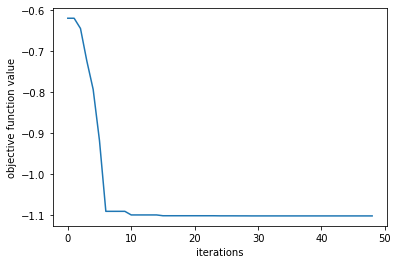

In [13]:
GG = Optimizer(GIVE_ENERGY_lin_alg,
                   combined_ia_ijab_random_input,
                   args=(),
                   method='Nelder-Mead',
                   jac=None,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-8, 
                   display_convergence_message=True,
                   display_steps=True)
GG.get_env(50)
GG.plot_convergence()
plt.show()

In [14]:
### optimizer

def calc_gradient_ADAM(theta_ijab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ijab_list):
        
        new_theta_list = theta_ijab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_lin_alg(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_lin_alg(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

0: Input_to_Funct: [1.94803221 6.36726253 0.15335709]: Output: -0.6325702330147207
1: Input_to_Funct: [2.04742895 6.46480407 0.07493593]: Output: -0.6893879749057522
2: Input_to_Funct: [ 2.14682099  6.55801774 -0.00899366]: Output: -0.757933631673362
3: Input_to_Funct: [ 2.24673617  6.64873578 -0.09763464]: Output: -0.8307077696115138
4: Input_to_Funct: [ 2.34719948  6.73783161 -0.19028473]: Output: -0.8945906833766741
5: Input_to_Funct: [ 2.44701848  6.82300406 -0.28388115]: Output: -0.933965981211828
6: Input_to_Funct: [ 2.5424945   6.89744511 -0.36624391]: Output: -0.9395741459347581
7: Input_to_Funct: [ 2.62674696  6.95023702 -0.41409506]: Output: -0.9218956078377645
8: Input_to_Funct: [ 2.69305087  6.97048119 -0.42107289]: Output: -0.9033605347850896
9: Input_to_Funct: [ 2.73902885  6.95881719 -0.39758491]: Output: -0.8974293095548406
10: Input_to_Funct: [ 2.76641668  6.92294186 -0.35336746]: Output: -0.9069455073310638
11: Input_to_Funct: [ 2.77901911  6.86969983 -0.29480064]: Ou

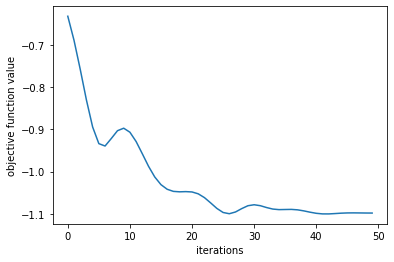

In [15]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_lin_alg,
                   combined_ia_ijab_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(50)
GG.plot_convergence()
plt.show()

# Reduced Ansatz


From PHYS. REV. X, **8**, 031022 (2018):

$$U = e^{-i \theta Y_{0} X_{1} X_{2} X_{3}}$$

- when acting on $| 1100 \rangle_{HF-JW-STATE}$ 

$$U | \psi_{HF}\rangle = | \psi_{UCCSD}\rangle$$

to do this in Q.C the following circuit is employed:

In [16]:
######### Ansatz circuit

from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz(theta):
    HF_circ = [cirq.X.on(cirq.LineQubit(0)), cirq.X.on(cirq.LineQubit(1))]
    
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1 X2 X3', -1j), theta)
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
H2_ansatz(np.pi)  

0: ───X───Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───
                     │                              │
1: ───X───H──────────X───@──────────────────────@───X───H───────────
                         │                      │
2: ───H──────────────────X───@──────────────@───X───H───────────────
                             │              │
3: ───H──────────────────────X───Rz(2.0π)───X───H───────────────────

In [17]:
ciruict = H2_ansatz(np.pi)
len(list(ciruict.all_operations()))

17

In [18]:
SET_index = 7
N_index = 1

ansatz = H2_ansatz(np.pi)  


R_uncorrected, Pn, gamma_l = Get_R_op_list(anti_commuting_sets[SET_index], N_index)
R_corrected_Op_list, R_corr_list, ancilla_amplitudes, l1 = absorb_complex_phases(R_uncorrected)
###

Q_circuit = Full_Q_Circuit(Pn,
                       R_corrected_Op_list,
                       R_corr_list,
                       ancilla_amplitudes,
                       Hamilt.molecule.n_qubits , 
                       ansatz)

Q_circuit

0: ───X──────────────────Rx(0.5π)───@──────────────────────────────@───Rx(-0.5π)───I──────X0─────────────────────────────
                                    │                              │               │      │
1: ───X──────────────────H──────────X───@──────────────────────@───X───H───────────I──────Y1─────────────────────────────
                                        │                      │                   │      │
2: ───H─────────────────────────────────X───@──────────────@───X───H───────────────I──────Y2─────────────────────────────
                                            │              │                       │      │
3: ───H─────────────────────────────────────X───Rz(2.0π)───X───H───────────────────1*I3───1j*Y3──────────────────────M───
                                                                                   │      │                          │
4: ─── U = 1.1671 rad ─────────────────────────────────────────────────────────────(0)────@─────── U = 1.1671 rad ───M───

In [19]:
# print(Q_circuit.to_qasm())/

In [20]:
list(Q_circuit.all_operations())

[cirq.X.on(cirq.LineQubit(0)),
 cirq.X.on(cirq.LineQubit(1)),
 cirq.H.on(cirq.LineQubit(2)),
 cirq.H.on(cirq.LineQubit(3)),
  U_arb_state_prep.on(cirq.LineQubit(4)),
 cirq.rx(np.pi*0.5).on(cirq.LineQubit(0)),
 cirq.H.on(cirq.LineQubit(1)),
 cirq.CNOT.on(cirq.LineQubit(0), cirq.LineQubit(1)),
 cirq.CNOT.on(cirq.LineQubit(1), cirq.LineQubit(2)),
 cirq.CNOT.on(cirq.LineQubit(2), cirq.LineQubit(3)),
 cirq.rz(np.pi*2.0).on(cirq.LineQubit(3)),
 cirq.CNOT.on(cirq.LineQubit(2), cirq.LineQubit(3)),
 cirq.CNOT.on(cirq.LineQubit(1), cirq.LineQubit(2)),
 cirq.H.on(cirq.LineQubit(3)),
 cirq.CNOT.on(cirq.LineQubit(0), cirq.LineQubit(1)),
 cirq.H.on(cirq.LineQubit(2)),
 cirq.rx(np.pi*-0.5).on(cirq.LineQubit(0)),
 cirq.H.on(cirq.LineQubit(1)),
 cirq.ControlledOperation(controls=(cirq.LineQubit(4),), sub_operation=LCU_Pauli_Word_Gates.on(cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3)), control_values=((0,),)),
 cirq.ControlledOperation(controls=(cirq.LineQubit(4),), sub_oper

In [66]:
list(Q_circuit.all_operations())[-3].qubits

(cirq.LineQubit(4),
 cirq.LineQubit(0),
 cirq.LineQubit(1),
 cirq.LineQubit(2),
 cirq.LineQubit(3))

In [89]:
Q_circuit.final_wavefunction().shape

(32,)